In [1]:
import gradio
import gradio as gr

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
data_dir = "/Users/ayepp/Desktop/archive/img/train"

In [4]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4024 files belonging to 5 classes.
Using 3220 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4024 files belonging to 5 classes.
Using 804 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['bed', 'chair', 'sofa', 'swivelchair', 'table']


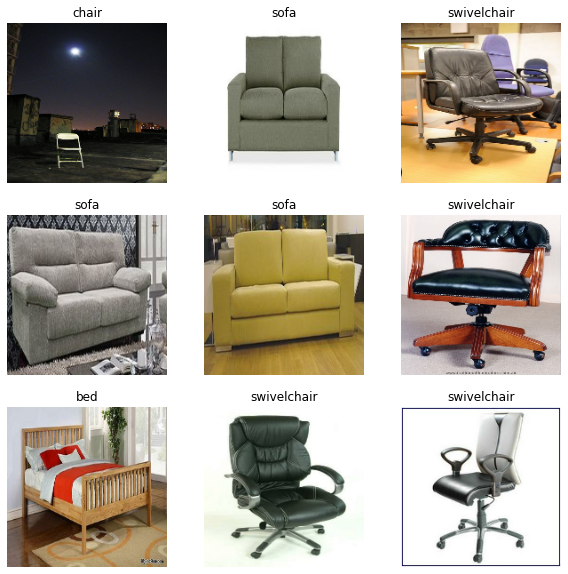

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
101/101 [==============================] - 42s 410ms/step - loss: 1.4650 - accuracy: 0.4282 - val_loss: 0.7976 - val_accuracy: 0.7127
Epoch 2/10
101/101 [==============================] - 39s 383ms/step - loss: 0.6116 - accuracy: 0.7828 - val_loss: 0.6177 - val_accuracy: 0.7774
Epoch 3/10
101/101 [==============================] - 39s 387ms/step - loss: 0.3700 - accuracy: 0.8759 - val_loss: 0.7982 - val_accuracy: 0.7562
Epoch 4/10
101/101 [==============================] - 40s 389ms/step - loss: 0.2681 - accuracy: 0.9071 - val_loss: 0.6292 - val_accuracy: 0.8184
Epoch 5/10
101/101 [==============================] - 40s 395ms/step - loss: 0.1543 - accuracy: 0.9454 - val_loss: 0.7707 - val_accuracy: 0.8097
Epoch 6/10
101/101 [==============================] - 40s 394ms/step - loss: 0.0671 - accuracy: 0.9788 - val_loss: 0.8828 - val_accuracy: 0.8246
Epoch 7/10
101/101 [==============================] - 41s 397ms/step - loss: 0.0332 - accuracy: 0.9910 - val_loss: 1.1622 - val_ac

In [11]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Running locally at: http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.
Interface loading below...
